In [2]:
import json
# import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
import pickle
# from constants import *
import rioxarray as rxr
import geopandas as gpd
from locale import atof, setlocale, LC_NUMERIC
from pyproj import crs
import sys
import cartopy.crs as ccrs


import contextily as cx
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# plt.style.use(home_ir+'stylefile.mplstyle')
# setlocale(LC_NUMERIC,'')
# atof('123,123')
#homedir = '/global/home/users/cowherd/snow_fires/'
# datadir = '/global/scratch/users/cowherd/'

homedir = '/home/marianne/Documents/snow_fires/'
rawdatadir = '/home/marianne/Documents/data/'
datadir = homedir + 'data/'
# homedir = '/global/home/users/cowherd/snow_fires/'
# rawdatadir = '/global/scratch/users/cowherd/'

os.chdir(homedir)


wgs_crs = crs.CRS('epsg:4326')
use_crs = wgs_crs


In [3]:
## load fire data
rawdatadir = '/home/marianne/data/'
datadir = '/home/marianne/Documents/snow_fires/data/'

gages_metadata = gpd.read_file(rawdatadir + 'snow_fires_data/gages_metadata.gdf').to_crs(wgs_crs)
fires_allyears = gpd.read_file(rawdatadir + 'snow_fires_data/fires_allyears.gdf').to_crs(wgs_crs)
# bas_all = gpd.read_file(rawdatadir + 'snow_fires_data/bas_all.gdf').to_crs(wgs_crs)
gaged_basins_gdf = gpd.read_file(rawdatadir + 'snow_fires_data/gaged_basins_gdf.gdf').to_crs(wgs_crs)
snowzone = gpd.read_file(rawdatadir + 'snowzone/snowzone.shp').to_crs(wgs_crs)

snow_in = gpd.overlay(gaged_basins_gdf,snowzone)
gaged_ia_fires = gpd.overlay(gaged_basins_gdf,fires_allyears)

mtbs = gpd.read_file(rawdatadir + 'mtbs/mtbs_perims_DD.shp')
gaged_mtbs = gpd.overlay(gaged_basins_gdf,mtbs)
gaged_fires = gaged_mtbs

with open(datadir + 'burn_snow_history_target.pickle', 'rb') as handle:
    burn_snow_history_target = pickle.load(handle)

In [4]:
fn = rawdatadir + 'snowy_count.tif'
tmp = rxr.open_rasterio(fn)

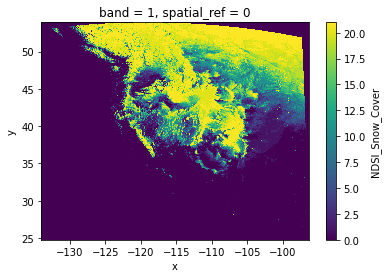

In [5]:
tmp.plot()
plt.show()

In [6]:
fn = rawdatadir + 'scfgt25.tif'
tmp1 = rxr.open_rasterio(fn)

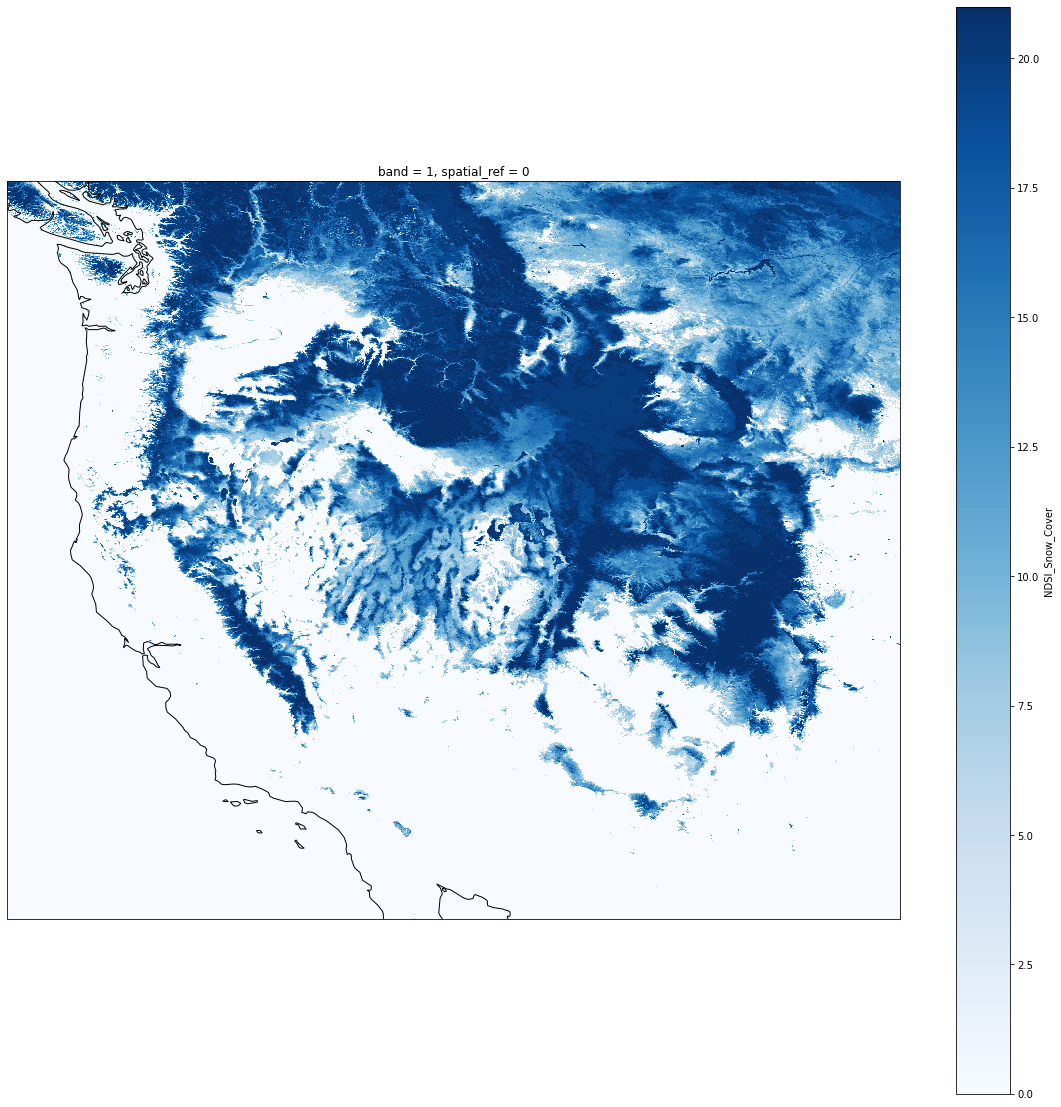

In [7]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
tmp1.plot(cmap = 'Blues',ax=ax)
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
plt.show()

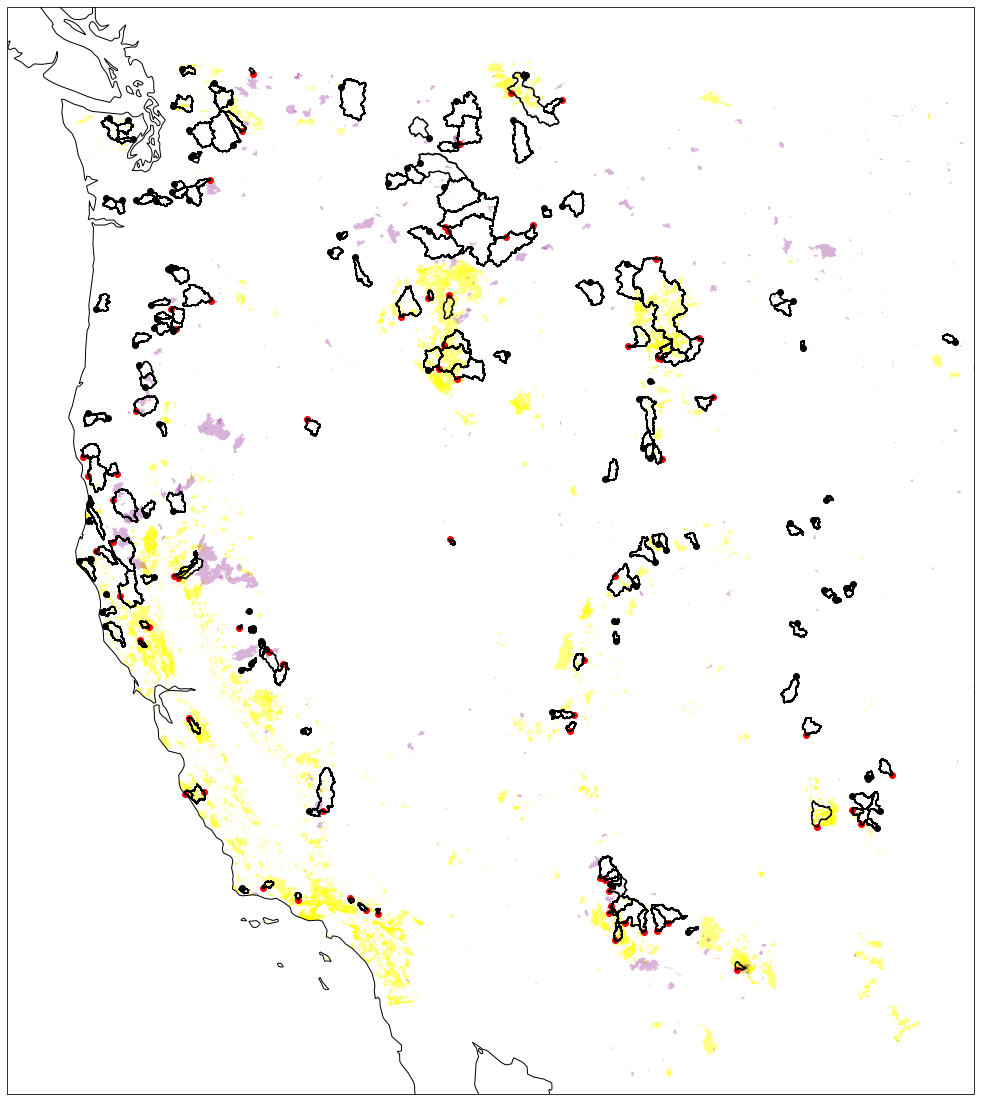

In [236]:
tmp = [gages_metadata.loc[gages_metadata.gage_id == i] for i in errs]
nans = [gages_metadata.loc[gages_metadata.gage_id == i] for i in nanids]
good = [gages_metadata.loc[gages_metadata.gage_id == i] for i in burn_snow_history_target.gage_id]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
fires_allyears.plot(ax=ax,color='yellow',alpha=0.5) ## fires
wfigs21.plot(ax=ax,color='purple',alpha=0.3)
gaged_basins.boundary.plot(ax=ax,color='black')
for i in tmp:
    i.plot(ax=ax,color='red')
for i in nans:
    i.plot(ax=ax,color='black')
for i in good:
    i.plot(ax=ax,color='blue')
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
plt.show()



(array([ 9., 14.,  6., 36., 43., 14., 12., 11.,  8.,  9., 36.,  7., 27.,
         9., 18., 23., 45., 19., 31., 59., 11., 23., 37., 41., 39., 26.,
        22., 31., 73., 42., 20., 74., 51., 71., 48., 64.]),
 array([1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
        1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
        2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
        2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020.]),
 <BarContainer object of 36 artists>)

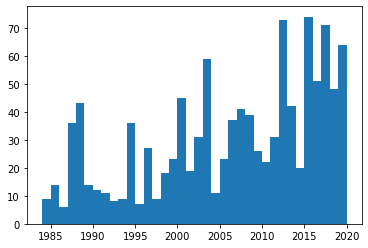

In [318]:
plt.hist(gaged_fires.Fire_Year.loc[gaged_fires.Fire_Year>1900],bins=36)

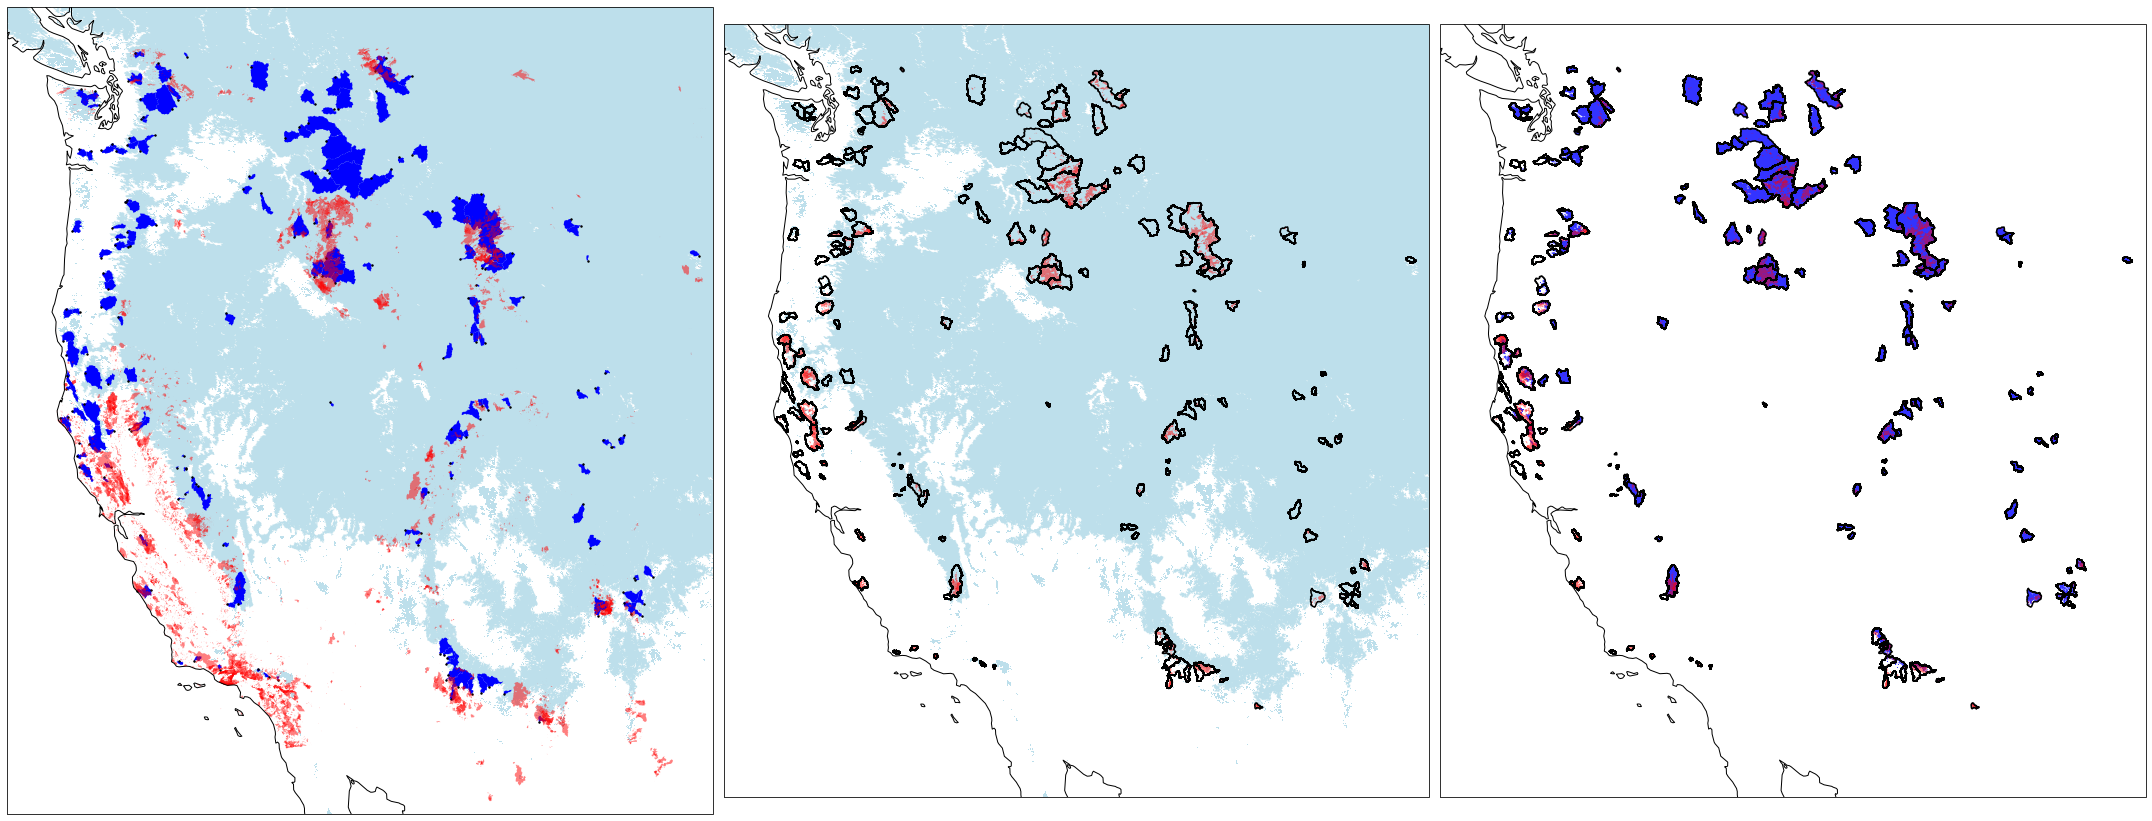

In [319]:
## plot showing gaged basins that fit the williams parameters, location of the gages, and fire boundaries
import cartopy.crs as ccrs
fig = plt.figure(figsize=(30, 60))
# first plot
ax1 = fig.add_subplot(131,projection=ccrs.PlateCarree())
ax1.coastlines()
snowzone.plot(ax=ax1, color='lightblue',alpha=0.8) ## snowzone
gaged_basins_gdf.plot(ax=ax1,color='blue') ##outlines of gaged basins
gages_metadata.plot(ax=ax1,color='k',markersize=2)
fires_allyears.plot(ax=ax1,color='red',alpha=0.5) ## fires
ax1.set_xlim(-126,-103)
ax1.set_ylim(31,50)

#second plot
ax2 = fig.add_subplot(132,projection=ccrs.PlateCarree())
ax2.coastlines()
snowzone.plot(ax=ax2, color='lightblue',alpha=0.8) ## snowzone
gaged_fires.plot(ax=ax2,color='red',alpha=0.5)
gaged_basins.boundary.plot(ax=ax2,color='black')
ax2.set_xlim(-126,-103)
ax2.set_ylim(31,50)

#third plot
ax3 = fig.add_subplot(133,projection=ccrs.PlateCarree())
ax3.coastlines()
snow_in.plot(ax=ax3,color='blue',alpha = 0.8)
gaged_basins.boundary.plot(ax=ax3,color='k')
gaged_fires.plot(ax=ax3,color='red',alpha=0.5)
ax3.set_xlim(-126,-103)
ax3.set_ylim(31,50)

plt.tight_layout()
plt.show()
# plt.savefig(homedir + 'figures/snowzone_context.jpg')


In [331]:
## is the seasonal snow cover zone changing in time? partition accumulation and melt, compare accumulation vs. ablation vs. timing
## freq of SCA before and after
## SDD
## more meaningful wrt fire analysis
## comparison/assessment of reanalysis at burned sites
## sentinel1 csnow, university of arizona reanalysis data set. is that checked w/ snotel?
## https://nsidc.org/data/nsidc-0719

In [328]:
pct_burned = burn_snow_history_target.burned_prop

pct_burned_snow =  burn_snow_history_target.sba_prop

df = pd.DataFrame({'pct_burned' : pct_burned, 'pct_burned_snow': pct_burned_snow})

In [355]:
df

,pct_burned,pct_burned_snow
0,0.275007,1.000000
1,0.318261,1.000000
2,0.213732,1.000000
3,0.132071,1.000000
4,0.533676,0.716319
...,...,...
67,0.163902,0.413732
68,0.085189,1.000000
69,0.113549,1.000000
70,0.236769,0.452130


In [397]:
strat_pct  = np.zeros((10,5))
lows = np.arange(0,1,0.1)
lows2 = np.arange(0,1,0.2)
for i in range(10):
    low = lows[i]
    tmp = df.loc[(pct_burned >= low) & (pct_burned < low + 0.1)]
    for j in range(5):
        low2 = lows2[j]
        pburn = tmp.loc[(tmp.pct_burned_snow >= low2) & (tmp.pct_burned_snow < low2 + 0.2)]
        strat_pct[i,j] = len(pburn)



In [399]:
strat_pct  = np.zeros((11,6))
lows = np.arange(0,1.1,0.1)
lows2 = np.arange(0,1.2,0.2)
for i in range(11):
    low = lows[i]
    tmp = df.loc[(pct_burned >= low) & (pct_burned < low + 0.1)]
    for j in range(6):
        low2 = lows2[j]
        pburn = tmp.loc[(tmp.pct_burned_snow >= low2) & (tmp.pct_burned_snow < low2 + 0.2)]
        strat_pct[i,j] = len(pburn)

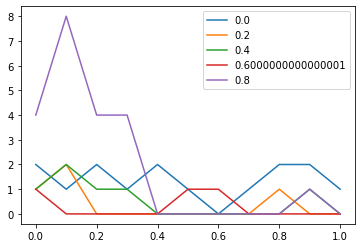

In [400]:
fig,ax=plt.subplots()
for i in range(5):
    ax.plot(lows,strat_pct[:,i],label = lows2[i])
ax.legend()
plt.show()

In [401]:
np.nansum(strat_pct)


72.0

Text(0, 0.5, 'number of watersheds')

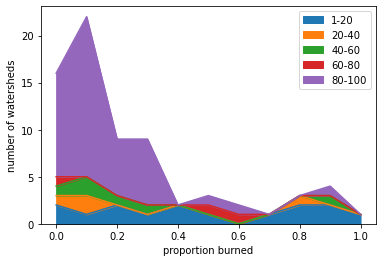

In [405]:
df2 = pd.DataFrame(data = {'1-20':strat_pct[:,0],
                            '20-40':strat_pct[:,1],
                            '40-60':strat_pct[:,2],
                            '60-80':strat_pct[:,3],
                            '80-100':strat_pct[:,4] + strat_pct[:,5]},
                    index=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax = df2.plot.area()

ax.set_xlabel('proportion burned')
ax.set_ylabel('number of watersheds')

(0.0, 1.0)

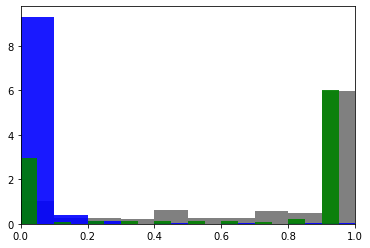

In [65]:
fig,ax=plt.subplots()
ax.hist(burn_snow_history.snowy_prop,alpha = 1, density=True,color='gray')
tmp = []
for i in burn_snow_history.snow_burned_prop:
    for j in i:
        tmp.append(j)

tmp2 = []
for i in burn_snow_history.burned_prop:
    for j in i:
        tmp2.append(j)
tmp3 = [np.nanmin([1,val]) for val in tmp2]
ax.hist(tmp3,alpha = .9,density=True,bins=10,color ='blue')
ax.hist(tmp,alpha = 0.9,density=True,width = 0.05,bins=10,color='green')
ax.set_xlim((0,1))


In [50]:
x= [burn_snow_history.burned_prop[i][-1] for i in range(len(burn_snow_history))]
y= [burn_snow_history.snowy_burned_area[i][-1]/burn_snow_history.basin_area[i] for i in range(len(burn_snow_history))]


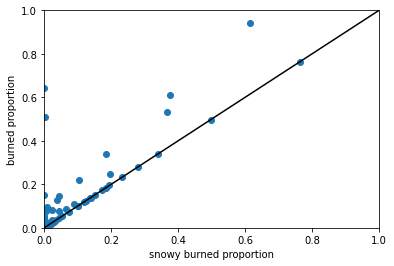

In [59]:
fig,ax=plt.subplots()
ax.plot(y,x,'o')
ax.set_xlabel('snowy burned proportion')
ax.set_ylabel('burned proportion')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.plot([0,1],[0,1],'k-')
plt.show()

In [212]:
# fig,ax=plt.subplots()
for id in gages[-3:-1]:
    id = '14400000'
    try:
        sf =pickle.load(open(datadir + 'streamflow'+id+'.pickle','rb'))
        dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
        # prefire_t = dates[dates.year < sf.fireyear[0]]
        print(id)
    except:
        print('no' + id)
        continue
sf

14400000
14400000


,streamflow,fireyear
1988-10-01T00:30:00.000-07:00,77.0,2017.0
1988-10-01T01:00:00.000-07:00,77.0,2017.0
1988-10-01T01:30:00.000-07:00,77.0,2017.0
1988-10-01T02:00:00.000-07:00,77.0,2017.0
1988-10-01T02:30:00.000-07:00,75.0,2017.0
...,...,...
2022-05-06T08:30:00.000-07:00,6720,2017.0
2022-05-06T08:45:00.000-07:00,6770,2017.0
2022-05-06T09:00:00.000-07:00,6720,2017.0
2022-05-06T09:15:00.000-07:00,6770,2017.0


In [233]:
dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
sf['dt'] = dates
years = [v.year for v in dates]
sf['year'] = years
wateryears = []
for v in dates:
    if v.month>9:
        wateryears.append(v.year)
    else:
        wateryears.append(v.year-1)
sf['wy'] = wateryears
prefire_t = []
postfire_t= []
prefire_sf = []
postfire_sf = []
fire_t = []
fire_sf = []
for i in range(len(dates)):
    if (dates[i].year < sf.fireyear[0]): 
        prefire_t.append(dates[i])
        prefire_sf.append(float(sf.streamflow.values[i]))
    elif (dates[i].year > sf.fireyear[0]): 
        postfire_t.append(dates[i])
        postfire_sf.append(float(sf.streamflow.values[i]))
    else: with open(datadir + 'burn_snow_history.pickle', 'wb') as handle:
    pickle.dump(burn_snow_history, handle,protocol=pickle.HIGHEST_PROTOCOL)
        fire_t.append(dates[i])
        fire_sf.append(float(sf.streamflow.values[i]))



In [241]:
totflows = []
peakflows = []
peakdays = []
wys=[]
startyear = dates[0].year
endyear = dates[-1].year
for yr in range(startyear,endyear):
    try:
        thisyear = sf.loc[sf.wy == yr]
        peakdays.append(np.nanargmax(thisyear.streamflow.astype(float)))
        totflows.append(np.nansum(thisyear.streamflow.values.astype(float)))
        peakflows.append(np.nanmax(thisyear.streamflow.astype(float)))
        wys.append(yr)
    except:
        continue

sumflow = pd.DataFrame(data = {'wy':wys,
                                'sumflow':totflows,
                                'peakflow':peakflows,
                                'peakday':peakdays})

In [240]:
len(peakdays)

33

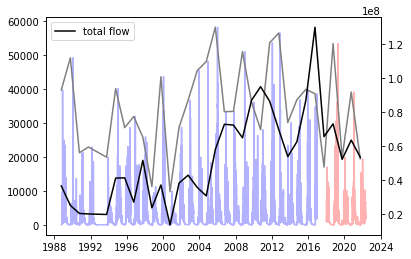

In [246]:
fig,ax=plt.subplots()
ax2 =ax.twinx()
wydts = [dt.datetime(year=val,day=1,month=10) for val in sumflow.wy]
ax.plot(prefire_t,prefire_sf,color='blue',alpha=0.3)
ax.plot(postfire_t,postfire_sf,color='red',alpha=0.3)
ax.plot(wydts,sumflow.peakflow,color='gray',label='peak flow')
ax2.plot(wydts,sumflow.sumflow,color='k',label='total flow')
# ax3.plot(wydts,sumflow.peakday,color='green')

'''ax.plot(sumflow.wy,sumflow.sumflow)
ax2.plot(sumflow.wy,sumflow.peakflow,color='purple')
ax3.plot(sumflow.wy,sumflow.peakday,color='green')
ax4.plot(prefire_t,prefire_sf,color='blue')
ax4.plot(postfire_t,postfire_sf,color='red')
ax.set_xlim(1995,2021)
ax4.set_xlim(dt.datetime(year=1995,day=1,month=1),dt.datetime(year=2021,day=1,month=1))'''
plt.legend()
plt.show()


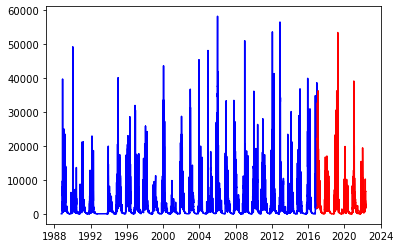

In [106]:
fig,ax=plt.subplots()
ax.plot(prefire_t,prefire_sf,'-',color='blue')
ax.plot(postfire_t,postfire_sf,'-',color='red')
plt.show()

In [112]:
#with open(datadir + 'burn_snow_history_2.pickle', 'rb') as handle:
 #   burn_history_data = pick=le.load(handle)
bhd=pickle.load(open(datadir+ 'burn_snow_history.pickle','rb'))
bhd['snowy_prop'] = bhd.snowy_area/bhd.basin_area

sba_props = []
sba_xsprops = []
for j in range(len(bhd)):
    entry = bhd.loc[j]
    sba_prop = []
    sba_xs = []
    for i in range(len(entry.year)):
        batmp = entry.burned_area[i]
        sbatmp = entry.snowy_burned_area[i]
        sbaproptmp = sbatmp/batmp
        sba_prop.append(sbaproptmp)
        sba_xs.append(sbaproptmp - entry.snowy_prop)
    sba_props.append(sba_prop)
    sba_xsprops.append(sba_xs)

bhd['burned_snow_xs'] = sba_xsprops
bhd['snow_burned_prop'] = sba_props
    

/tmp/ipykernel_12088/1652786762.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sbaproptmp = sbatmp/batmp


In [25]:
bhd.loc[0].burned_area[0]

17245664.65652508

(0.0, 1.0)

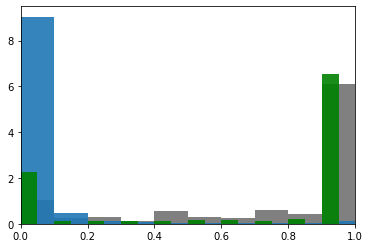

In [109]:
fig,ax=plt.subplots()
ax.hist(bhd.snowy_prop,alpha = 1, density=True,color='gray')
tmp = []
for i in bhd.snow_burned_prop:
    for j in i:
        tmp.append(j)

tmp2 = []
for i in bhd.burned_prop:
    for j in i:
        tmp2.append(j)
tmp3 = [np.nanmin([1,val]) for val in tmp2]
ax.hist(tmp3,alpha = .9,density=True,bins=10)
ax.hist(tmp,alpha = 0.9,density=True,width = 0.05,bins=10,color='green')
ax.set_xlim((0,1))


(array([  12.,   50.,   18.,   82.,  128.,  242.,   90.,   86.,  134.,
        3339.,  337.,  364.,  158.,  105.,  115.,  144.,   54.,   74.,
          67., 1568.]),
 array([-0.94183101, -0.84473945, -0.74764789, -0.65055633, -0.55346477,
        -0.45637321, -0.35928165, -0.26219009, -0.16509853, -0.06800697,
         0.02908459,  0.12617615,  0.22326771,  0.32035927,  0.41745083,
         0.51454239,  0.61163395,  0.70872551,  0.80581707,  0.90290863,
         1.00000019]),
 <BarContainer object of 20 artists>)

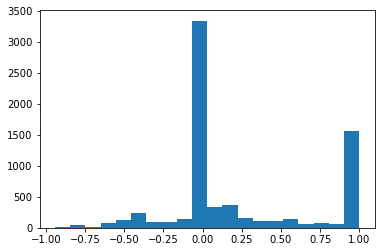

In [115]:
## excess snow burned
for i in bhd.burned_snow_xs:
    for j in i:
        tmp.append(j)
plt.hist(tmp,bins = 20)

In [77]:
np.sum(fires_in.to_crs('epsg:5070').area), np.nansum(gaged_basins.loc[gaged_basins.GAGE_ID==i].to_crs('epsg:5070').area)

(17375148.190148428, 79728845.5177586)

In [78]:
np.sum(fires_in.to_crs('epsg:5070').area)/np.nansum(gaged_basins.loc[gaged_basins.GAGE_ID==i].to_crs('epsg:5070').area) # percent burned!!

0.21792800431655984

In [139]:
## binning: accumulation vs melt. elevation, latitude. try to disentangle accumulation vs melt. derive some metrics? slope
## keithe musselman triangle model for snow slope

#time series , runoff ratio?
## nldas download? 

## metric derived? for SWE triangle, streamflow?
## meeting on tuesday 10pm

<AxesSubplot:>

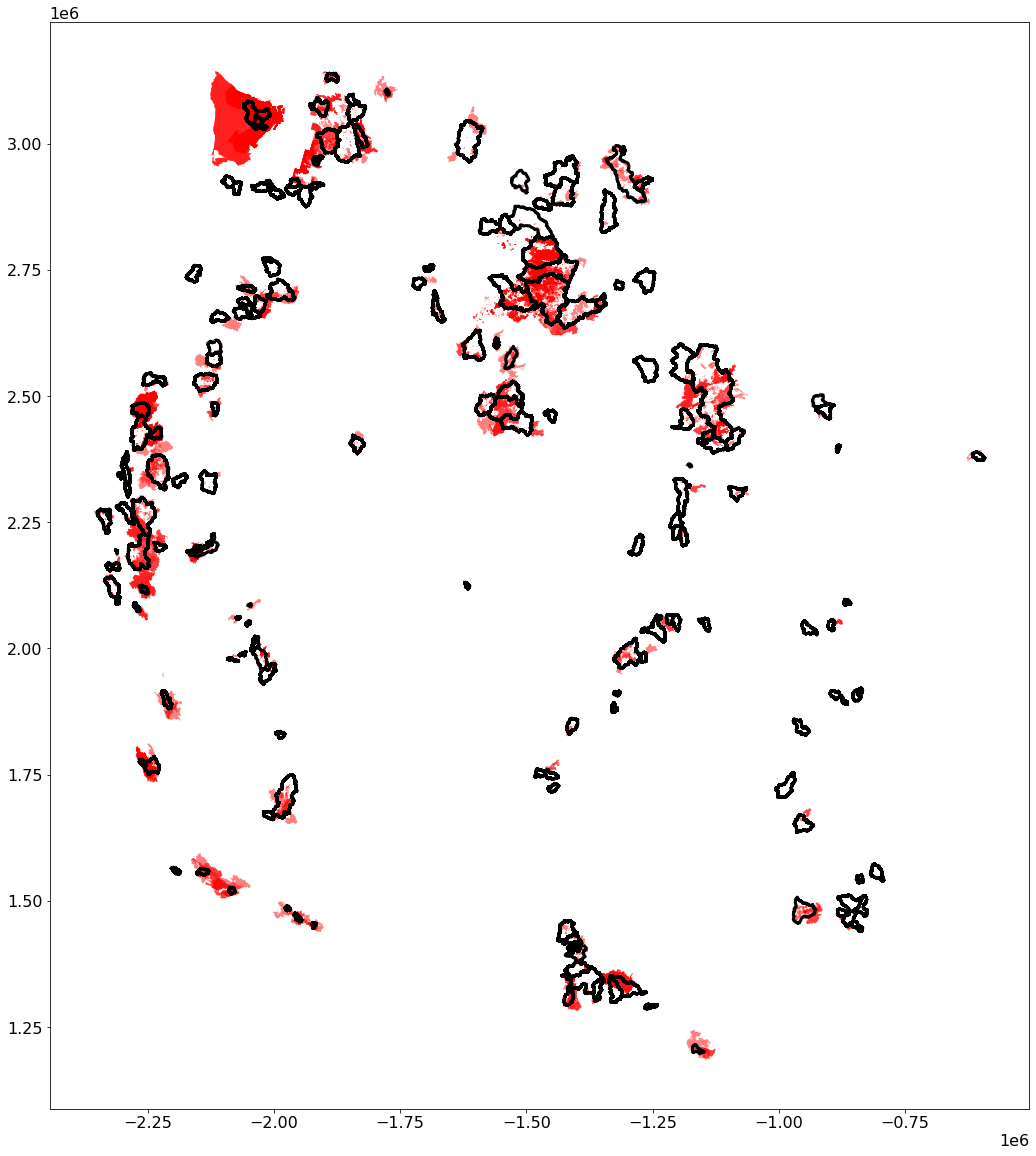

In [ ]:
# gaged_basins
# fires_allyears
# snowzone_rp
test_basin = gaged_basins[gaged_basins.index==1927]
test_basin = test_basin.to_crs(fires_allyears.crs)
test_burned = gpd.overlay(fires_allyears,test_basin)
# print(test_basin.area,test_burned.area)
fig,ax=plt.subplots()
test_burned[test_burned.index==test_burned.index[1]].plot(ax=ax,color='r',alpha=0.5)
test_burned.plot(ax=ax,color='r',alpha = 0.5)
test_basin.boundary.plot(ax=ax,color='black')


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [46]:
fire1 = test_burned[test_burned.index==test_burned.index[1]]

In [127]:
test_basin = gaged_basins[gaged_basins.index==1927]

<AxesSubplot:>

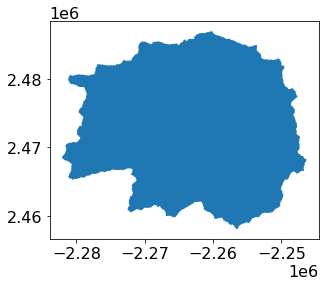

In [128]:
test_basin.plot()

C:\Users\Marianne\AppData\Local\Temp/ipykernel_13828/436379393.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...

  test = gpd.sjoin(test_basin,snowzone_rp)


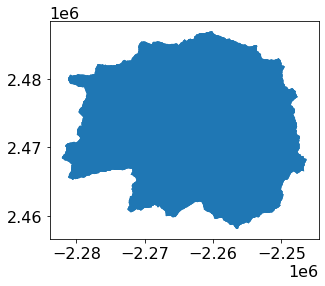

In [129]:
test = gpd.sjoin(test_basin,snowzone_rp)

fig,ax = plt.subplots()
test.plot(ax=ax)
plt.show()

In [54]:
## to do
## calculate how much of each basin is burned
## get mtbs burn severity layer and load
## clip to relevant years
## calculate how much of each basin is in the SSZ?
## how much of the burn area was SSZ?
## how to clip vectors to vectors?
## convert snowzone to a raster?
## need to download an elevation raster!! maybe SRTM?
## add contextily

,AREA,PERIMETER,GAGE_ID,geometry
1,79728300.0,55920.0,05014500,"POLYGON ((-1312215.000 2990115.000, -1312215.0..."


In [97]:
# test_snow = snowzone_rp.clip(test_basin.geometry)
test_snow =gpd.sjoin(snowzone_rp,test_basin)
fig,ax=plt.subplots()
test_snow.plot(ax=ax)
test_basin.boundary.plot(ax=ax)
#snowzone_rp.plot(ax=ax)

TypeError: '>=' not supported between instances of 'float' and 'Polygon'

In [59]:
ssz_raster = snowzone_rp.to_xarray()

In [81]:
fn = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean/GOSIF_GPP_2005.M08_Mean.tif'
tmp = rxr.open_rasterio(fn)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]] EPSG:4326


In [100]:
snowzone_4326 = snowzone.to_crs('epsg:4326')
gpp_snowzone = tmp.rio.clip(snowzone_4326.geometry)
test_gpp = tmp.rio.clip(test_basin.to_crs(tmp.rio.crs).geometry)


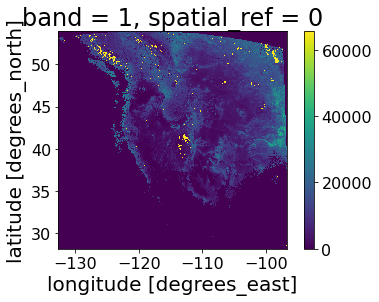

In [96]:
fig,ax = plt.subplots()
snowzone_4326.plot(ax=ax)
gpp_snowzone.plot(ax=ax)
plt.show()

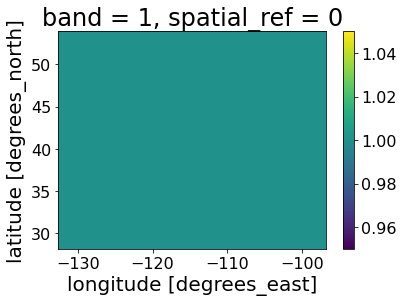

In [115]:
gpp_snowzone.notnull().plot()

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

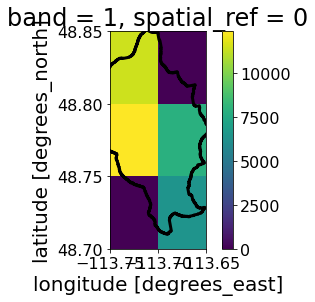

In [111]:
fig,ax=plt.subplots()
test_gpp.plot(ax=ax)
test_basin.to_crs(test_gpp.rio.crs).boundary.plot(ax=ax,color='k')

In [ ]:
## merge multiple fires? or just look at one year. what are the year bounds on the streamflow data
## how to get climate-based predictions
## runoff ratios from prism
## put this all on savio
## then autodownload and clip the prism bil files